# RAG - Retrieval Augmented Generation

## The RAG Framework 
Source : https://wandb.ai/cosmo3769/RAG/reports/A-Gentle-Introduction-to-Retrieval-Augmented-Generation-RAG---Vmlldzo1MjM4Mjk1

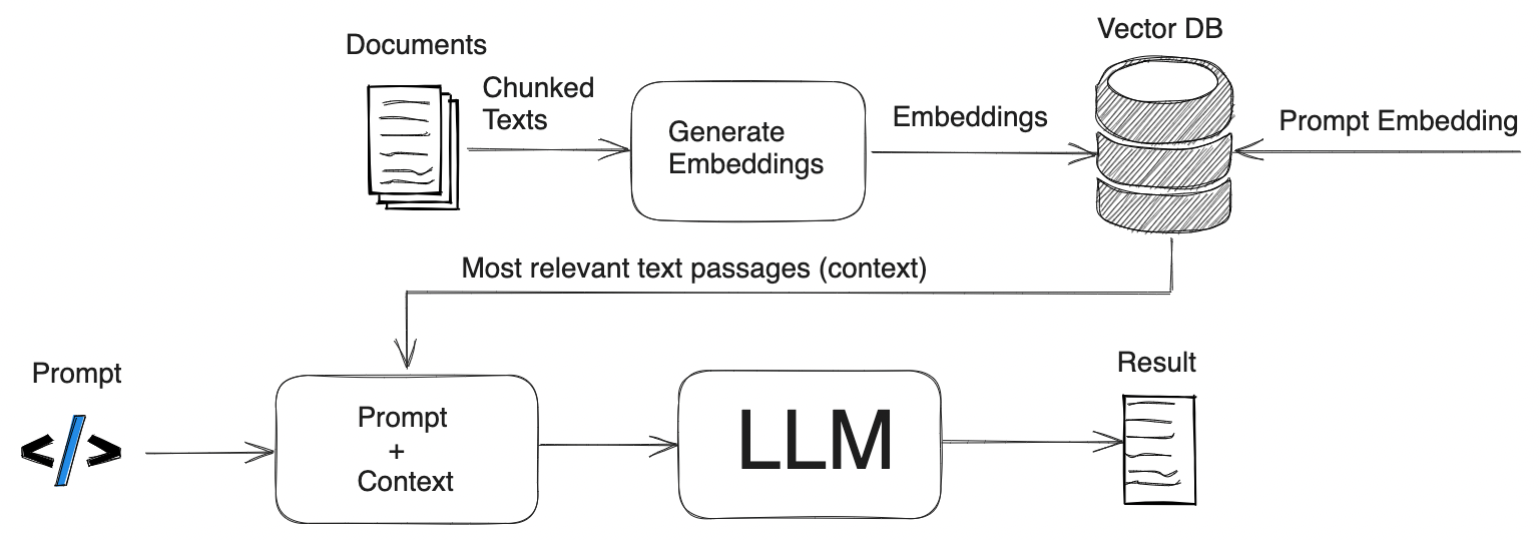

* **Prompt:** User gives instructions for what kind of answer they want.
* **Contextual Search:** System finds relevant information from various sources (databases, documents, APIs) to understand the prompt better.
* **Prompt Augmentation:** The system adds this extra information to the original prompt, making it richer and more specific.
* **Inference:** The language model uses the enhanced prompt to understand the user's intent better and generate a more accurate response.
* **Response:** The system provides the user with an answer that is both informative and relevant to their question.


# Simple RAG Pipeline

__Load > Transform > Embed__

* Langchain Document Loader : https://python.langchain.com/docs/modules/data_connection/document_loaders/

In [45]:
import os
from dotenv import load_dotenv
load_dotenv()

True

## RAG - Data Ingestion - document_loaders

### TextLoader()

In [46]:
## Data Ingestion - Text Loader
from langchain_community.document_loaders import TextLoader
loader = TextLoader("speech.txt", encoding='utf-8')
text_document = loader.load()
text_document

[Document(page_content='Friends! Twelve months ago a new programme of “Total Mobilisation” or “Maximum sacrifice” was placed before Indians in … day I shall give you an account of our achievements during the past year and shall place before you our demands for the coming year. But, before I do so, I want you to realize once again what a golden opportunity we have for winning freedom. The British are now engaged in a world-wide struggle, and in the course of this struggle, they have suffered defeat after defeat in so many fronts. The enemy having been thus considerably weakened, our fight for liberty has become very much easier than it was five years ago. Such a rare and God-given opportunity comes once in a century. That is why we have sworn to fully utilize this opportunity for liberating our Motherland from the British yoke.\n\nI am so very hopeful and optimistic about the outcome of our struggle, because I do not rely merely on the efforts of three million Indians in East Asia. Ther

### WebBaseLoader()

In [47]:
## Data Ingestion - Web Loader
from bs4 import BeautifulSoup, SoupStrainer
from langchain_community.document_loaders import WebBaseLoader

# Define the SoupStrainer object to filter out only desired content
# Specify classes 'post-title', 'post_content', and 'post_header'
strainer = SoupStrainer(class_=("post-title", "post-content", "post-header"))

# Instantiate WebBaseLoader with the appropriate arguments
# Provide the web page URL and pass the strainer object as bs_kwargs
loader = WebBaseLoader(
    web_path="https://lilianweng.github.io/posts/2023-03-15-prompt-engineering/",
    # Use the strainer for parsing only specific content
    bs_kwargs={"parse_only": strainer}
)

# Load the text document using the loader
web_document = loader.load()

In [48]:
display(web_document)

[Document(page_content='\n\n      Prompt Engineering\n    \nDate: March 15, 2023  |  Estimated Reading Time: 21 min  |  Author: Lilian Weng\n\n\nPrompt Engineering, also known as In-Context Prompting, refers to methods for how to communicate with LLM to steer its behavior for desired outcomes without updating the model weights. It is an empirical science and the effect of prompt engineering methods can vary a lot among models, thus requiring heavy experimentation and heuristics.\nThis post only focuses on prompt engineering for autoregressive language models, so nothing with Cloze tests, image generation or multimodality models. At its core, the goal of prompt engineering is about alignment and model steerability. Check my previous post on controllable text generation.\n[My personal spicy take] In my opinion, some prompt engineering papers are not worthy 8 pages long, since those tricks can be explained in one or a few sentences and the rest is all about benchmarking. An easy-to-use an

### pyPDF()

In [49]:
## Data Ingestion - PDF Loader
from langchain_community.document_loaders import PyPDFLoader

loader = PyPDFLoader("attention_mechanism.pdf")
pdf_document = loader.load()

In [50]:
display(pdf_document)

[Document(page_content='Provided proper attribution is provided, Google hereby grants permission to\nreproduce the tables and figures in this paper solely for use in journalistic or\nscholarly works.\nAttention Is All You Need\nAshish Vaswani∗\nGoogle Brain\navaswani@google.comNoam Shazeer∗\nGoogle Brain\nnoam@google.comNiki Parmar∗\nGoogle Research\nnikip@google.comJakob Uszkoreit∗\nGoogle Research\nusz@google.com\nLlion Jones∗\nGoogle Research\nllion@google.comAidan N. Gomez∗ †\nUniversity of Toronto\naidan@cs.toronto.eduŁukasz Kaiser∗\nGoogle Brain\nlukaszkaiser@google.com\nIllia Polosukhin∗ ‡\nillia.polosukhin@gmail.com\nAbstract\nThe dominant sequence transduction models are based on complex recurrent or\nconvolutional neural networks that include an encoder and a decoder. The best\nperforming models also connect the encoder and decoder through an attention\nmechanism. We propose a new simple network architecture, the Transformer,\nbased solely on attention mechanisms, dispensing 

In [51]:
pages = loader.load_and_split()

In [52]:
print(pages[0].page_content)

Provided proper attribution is provided, Google hereby grants permission to
reproduce the tables and figures in this paper solely for use in journalistic or
scholarly works.
Attention Is All You Need
Ashish Vaswani∗
Google Brain
avaswani@google.comNoam Shazeer∗
Google Brain
noam@google.comNiki Parmar∗
Google Research
nikip@google.comJakob Uszkoreit∗
Google Research
usz@google.com
Llion Jones∗
Google Research
llion@google.comAidan N. Gomez∗ †
University of Toronto
aidan@cs.toronto.eduŁukasz Kaiser∗
Google Brain
lukaszkaiser@google.com
Illia Polosukhin∗ ‡
illia.polosukhin@gmail.com
Abstract
The dominant sequence transduction models are based on complex recurrent or
convolutional neural networks that include an encoder and a decoder. The best
performing models also connect the encoder and decoder through an attention
mechanism. We propose a new simple network architecture, the Transformer,
based solely on attention mechanisms, dispensing with recurrence and convolutions
entirely. Experime

## RAG Pipeline - Transform - Text Splitters

### RecursiveCharacterTextSplitter()

Splits on a list of user defined characters

In [53]:
from langchain_text_splitters import RecursiveCharacterTextSplitter
text_splitter = RecursiveCharacterTextSplitter(
    chunk_size=1000, chunk_overlap=200)

documents = text_splitter.split_documents(documents=web_document)
print("No of chunks:", len(documents))

No of chunks: 43


In [54]:
documents[:5] # top 5 doc

[Document(page_content='Prompt Engineering\n    \nDate: March 15, 2023  |  Estimated Reading Time: 21 min  |  Author: Lilian Weng', metadata={'source': 'https://lilianweng.github.io/posts/2023-03-15-prompt-engineering/'}),
 Document(page_content='Prompt Engineering, also known as In-Context Prompting, refers to methods for how to communicate with LLM to steer its behavior for desired outcomes without updating the model weights. It is an empirical science and the effect of prompt engineering methods can vary a lot among models, thus requiring heavy experimentation and heuristics.\nThis post only focuses on prompt engineering for autoregressive language models, so nothing with Cloze tests, image generation or multimodality models. At its core, the goal of prompt engineering is about alignment and model steerability. Check my previous post on controllable text generation.', metadata={'source': 'https://lilianweng.github.io/posts/2023-03-15-prompt-engineering/'}),
 Document(page_content="[

## RAG Pipeline - Vector Embedding

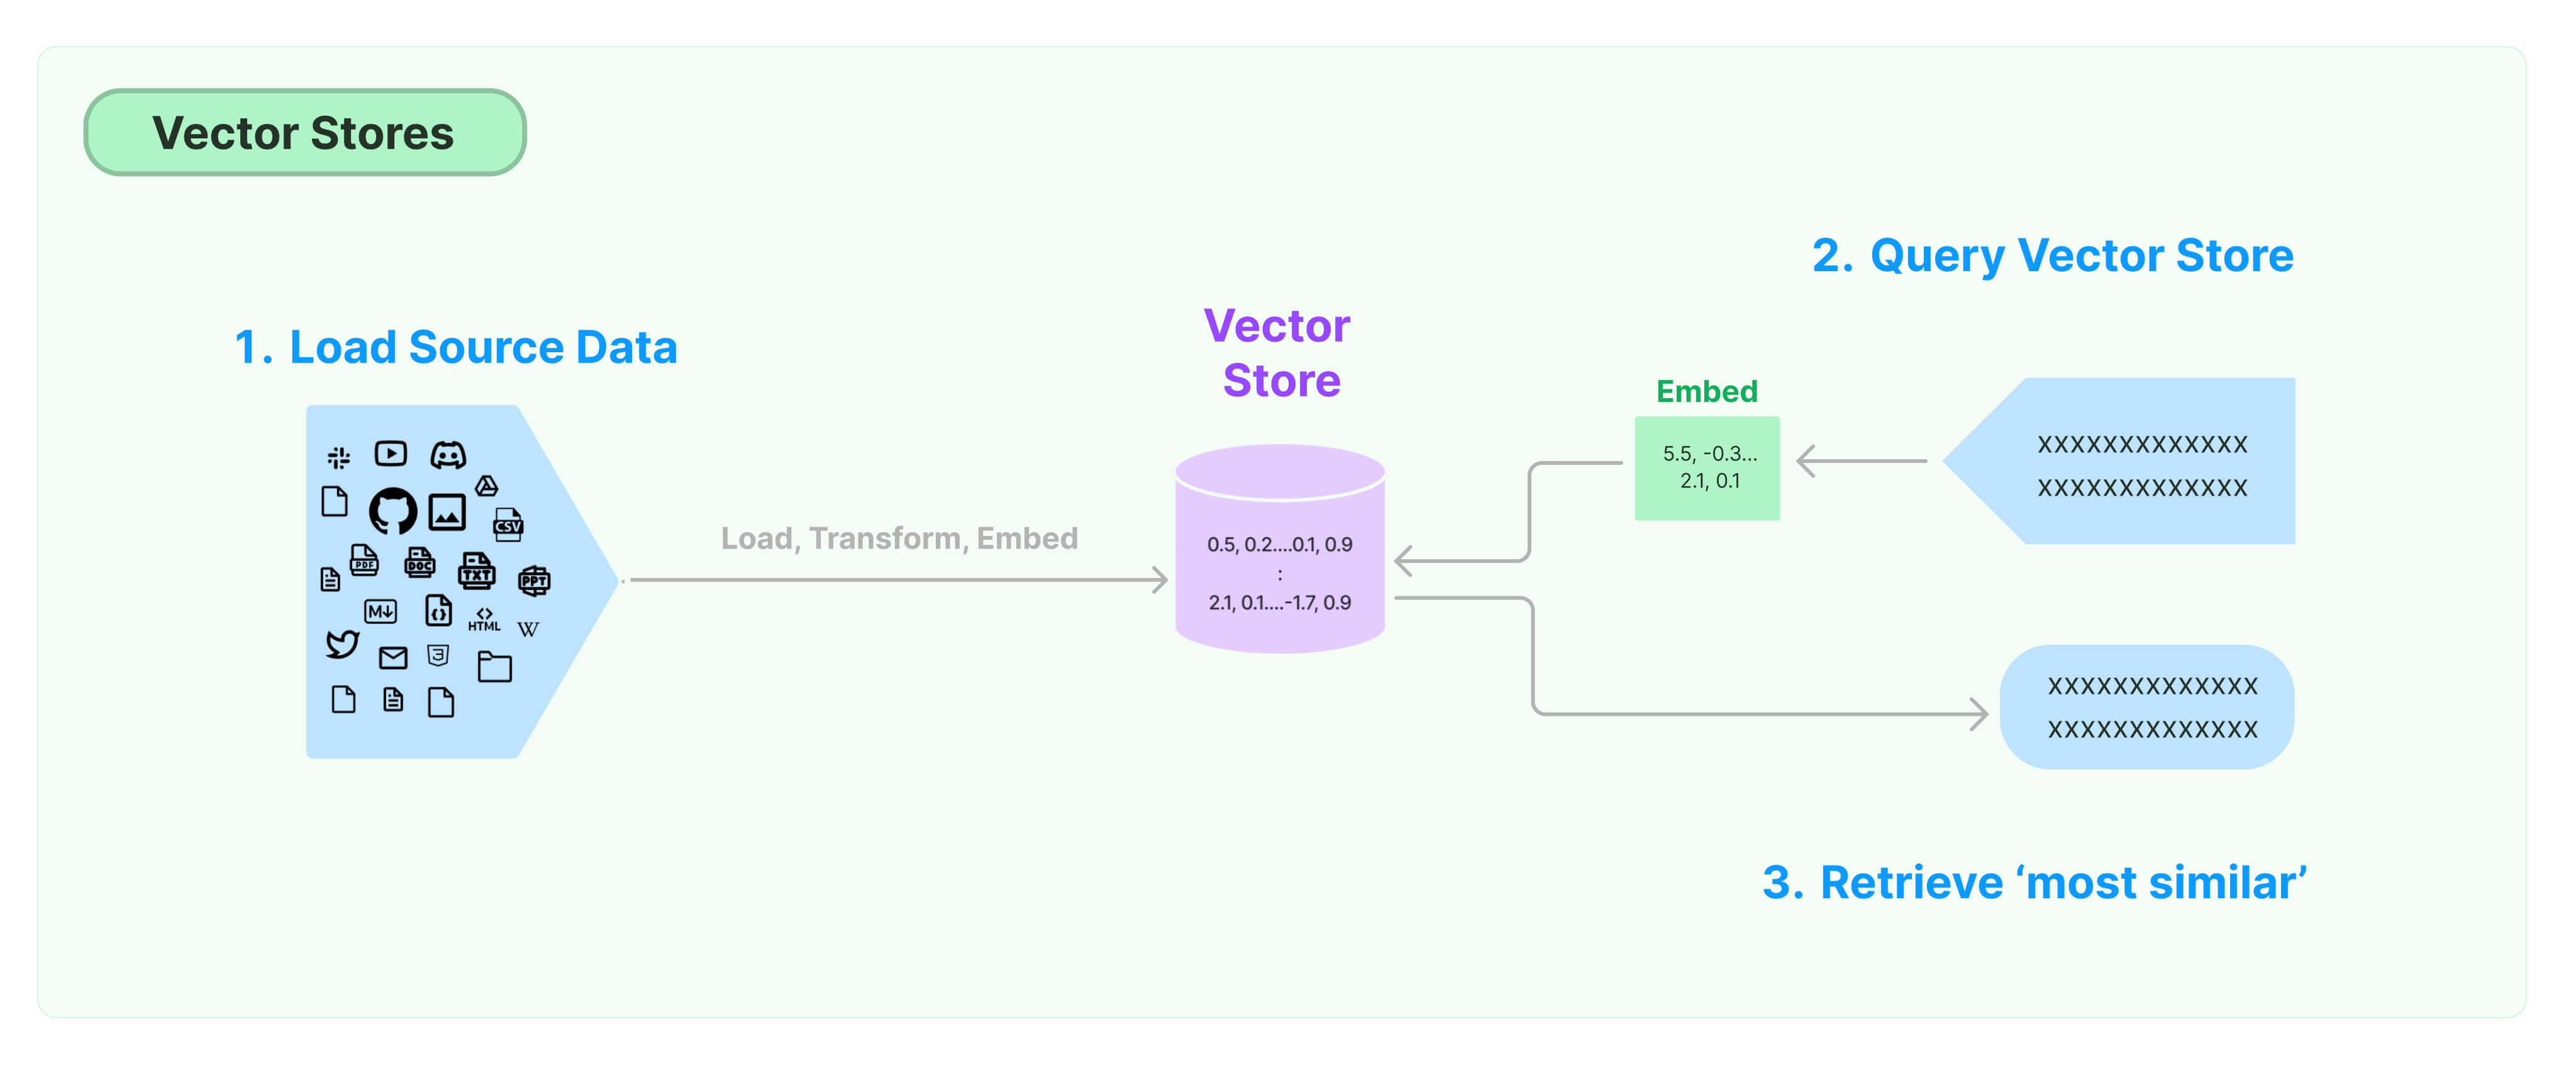

* There are a list of embedding providers. But I had used OllamaEmbeddings for LocalLLMs
* More details : https://python.langchain.com/docs/integrations/text_embedding/

### OllamaEmbeddings()

In [55]:
# Import OllamaEmbeddings
from langchain_community.embeddings import OllamaEmbeddings
embeddings = OllamaEmbeddings(model="mistral")

# Define a sample text document
text = "This is a test document."

# Use the embed_query method to generate embeddings for the text
query_result = embeddings.embed_query(text)

# Print the first 5 elements of the embedding vector
print("Ollama Mistral Model Embedding (Top 5):\n", query_result[:5])

Ollama Mistral Model Embedding (Top 5):
 [2.826972246170044, -1.7046138048171997, -0.7253643274307251, -10.708871841430664, 3.60787034034729]


### HuggingFaceBgeEmbeddings()

In [56]:
from langchain_community.embeddings import HuggingFaceBgeEmbeddings

model_name = "BAAI/bge-small-en"
model_kwargs = {"device": "cuda"}
encode_kwargs = {"normalize_embeddings": True}
hf = HuggingFaceBgeEmbeddings(
    model_name=model_name, model_kwargs=model_kwargs, encode_kwargs=encode_kwargs
)

In [57]:
embedding = hf.embed_query("hi this is harrison")
len(embedding)

384

In [58]:
# Print the first 5 elements of the embedding vector
print("HF BGE Embedding (Top 5):\n",embedding[:5])

HF BGE Embedding (Top 5):
 [-0.028416570276021957, 0.012183262966573238, 0.027443967759609222, -0.054828692227602005, 0.02423890307545662]


## RAG Pipeline - Vector Store

* I had used Chroma Vector Store
* Other Vector Stores: https://python.langchain.com/docs/integrations/vectorstores/

In [59]:
# %pip install -q langchain-chroma faiss-cpu

### Chroma Vector store

About ChromaDB : https://www.trychroma.com/

#### Pipeline for Storage
* __Data Loader__ : Using WebBaseLoader() to get data from [Blog: Prompt Engineering](https://lilianweng.github.io/posts/2023-03-15-prompt-engineering/)
* __Chunking__: Splitted it using RecursiveCharacterTextSplitter() with chunksize = 1000
* __Embedding__ : Using OllamaEmbeddings() with mistral model
* __Storage__ :  Vector Embeddings in ChromaDB

In [60]:
from langchain_chroma import Chroma

# Creating a Chorma VectorDB from the article
db = Chroma.from_documents(documents=documents, embedding=OllamaEmbeddings(model="mistral"))

In [61]:
# Chroma Vector DB
query = "What are the types of Chain of Thoughts"
results = db.similarity_search(query)
print(results)

[Document(page_content='Few-shot CoT. It is to prompt the model with a few demonstrations, each containing manually written (or model-generated) high-quality reasoning chains.', metadata={'source': 'https://lilianweng.github.io/posts/2023-03-15-prompt-engineering/'}), Document(page_content='Few-shot CoT. It is to prompt the model with a few demonstrations, each containing manually written (or model-generated) high-quality reasoning chains.', metadata={'source': 'https://lilianweng.github.io/posts/2023-03-15-prompt-engineering/'}), Document(page_content='RAG style, $p(a_i \\mid q) = \\sum_{i=1}^n p_\\text{tf-idf} (p_i \\mid q) \\cdot p_\\text{LM}(a_i \\mid q, p_i)$, where $p_\\text{tf-idf} (p_i \\mid q)$ is the normalized cosine similarities between the TF-IDF passage and question representations.\nNoisy channel inference, $p(a_i\\mid q) = \\frac{p_\\text{LM}(q \\mid a_i, p_i) \\cdot p_\\text{LM}(a_i \\mid p_i)}{p_\\text{LM}(q \\mid p_i)}$\nProduct-of-Experts (PoE), combines all probabi

In [62]:
len(results)

4

In [63]:
print(results[0].page_content)

Few-shot CoT. It is to prompt the model with a few demonstrations, each containing manually written (or model-generated) high-quality reasoning chains.


In [64]:
print(results[1].page_content)

Few-shot CoT. It is to prompt the model with a few demonstrations, each containing manually written (or model-generated) high-quality reasoning chains.


### FAISS Vector store

FAISS store by Facebook : https://github.com/facebookresearch/faiss

Applying FAISS on Attention Mechanism Research Paper

In [65]:
from langchain_text_splitters import CharacterTextSplitter
from langchain_community.vectorstores import FAISS

# Load the document, split it into chunks, embed each chunk and load it into the vector store.
raw_documents = PyPDFLoader('attention_mechanism.pdf').load()
text_splitter = CharacterTextSplitter(chunk_size=1000, chunk_overlap=0)
attention_documents = text_splitter.split_documents(raw_documents)
db2=_faiss = FAISS.from_documents(
    attention_documents, OllamaEmbeddings(model="mistral"))

In [66]:
# FAISS Vector DB
query = "Attention Mechanism architecture is having"
results = db2.similarity_search(query)
print(results[0].page_content)

Table 1: Maximum path lengths, per-layer complexity and minimum number of sequential operations
for different layer types. nis the sequence length, dis the representation dimension, kis the kernel
size of convolutions and rthe size of the neighborhood in restricted self-attention.
Layer Type Complexity per Layer Sequential Maximum Path Length
Operations
Self-Attention O(n2·d) O(1) O(1)
Recurrent O(n·d2) O(n) O(n)
Convolutional O(k·n·d2) O(1) O(logk(n))
Self-Attention (restricted) O(r·n·d) O(1) O(n/r)
3.5 Positional Encoding
Since our model contains no recurrence and no convolution, in order for the model to make use of the
order of the sequence, we must inject some information about the relative or absolute position of the
tokens in the sequence. To this end, we add "positional encodings" to the input embeddings at the
bottoms of the encoder and decoder stacks. The positional encodings have the same dimension dmodel
as the embeddings, so that the two can be summed. There are many choic

# Chain & Retriever in Langchain

A superpowered search engine

In the context of large language models (LLMs), "chain" and "retrieval" are  intertwined concepts used to build chatbots and information retrieval systems. Here's a breakdown:

**Retrieval:**

* This refers to the process of finding relevant information from a vast amount of data. 
* Imagine it as a search engine specifically designed for LLMs, sifting through text documents, code, or other relevant sources.
* In RAG (Retrieval-Augmented Generation), the retriever plays a crucial role by finding the most pertinent information for the generator to use in crafting a response.

**Chain:**

* A chain is a sequence of steps or functions that manipulate the user's input and retrieved information. 
* It can involve various tasks like:
    * **Query transformation:**  turning the user's question into a format the retriever understands.
    * **Retrieval:**  calling the retriever to find relevant data.
    * **Processing retrieved information:** potentially summarizing, reformatting, or combining retrieved data for the next step.
    * **Feeding information to the LLM:**  providing the retrieved and processed information to the LLM for response generation.

**Why are they used together?**

* LLMs are powerful for generating text, but they need guidance. 
* Chains provide a structured approach for feeding the LLM with relevant information retrieved based on the user's query. 
* This two-pronged approach (retrieval + chain) allows for more informative, accurate, and contextual responses.

**Conversational Retrieval Chains:**

* Chains can be further enhanced to handle conversations. 
* These "conversational retrieval chains" consider the entire chat history, not just the latest user input.
* This allows the system to understand the context of the conversation and retrieve information relevant to the ongoing discussion.

Overall, retrieval and chains are essential components for building intelligent information retrieval systems and chatbots. By working together, they enable LLMs to leverage retrieved information to create informative and contextually relevant responses.

In [67]:
from langchain_text_splitters import CharacterTextSplitter
from langchain_community.vectorstores import FAISS

# Load the document, split it into chunks, embed each chunk and load it into the vector store.
raw_documents = PyPDFLoader('attention_mechanism.pdf').load()
text_splitter = CharacterTextSplitter(chunk_size=1000, chunk_overlap=20)
attention_documents = text_splitter.split_documents(raw_documents)
db = FAISS.from_documents(
    attention_documents[:30], OllamaEmbeddings(model="mistral"))

In [68]:
from langchain_community.llms import Ollama
llm = Ollama(model="mistral")
llm

Ollama(model='mistral')

### Document Chain

In [72]:
from langchain.chains.combine_documents import create_stuff_documents_chain
from langchain_core.prompts import ChatPromptTemplate

prompt = ChatPromptTemplate.from_template("""
                                          Answer thr following questions strictly based on the provided context.
                                          Think your answer step by step before providing the answer.:
                                          <context>
                                          {context}
                                          </context>
                                          QUESTION: {input}
                                          """)

document_chain = create_stuff_documents_chain(llm, prompt)

### Retrieval Chain

In [73]:
from langchain.chains import create_retrieval_chain

retriever = db.as_retriever()
retrieval_chain = create_retrieval_chain(retriever, document_chain)

In [74]:
response = retrieval_chain.invoke(
    {"input": "What components Attention Mechansism is Having"})

In [78]:
print(response["answer"])

 The Transformer model architecture proposed in this paper relies entirely on an attention mechanism, called Self-Attention, to draw global dependencies between input and output sequences. It does not use recurrence or convolution as in other sequence modeling approaches like Extended Neural GPUs, ByteNet, or ConvS2S. The Transformer allows for more parallelization and reaches a new state of the art in translation quality after being trained for as little as twelve hours on eight P100 GPUs.

Self-attention, also known as intra-attention, is an attention mechanism that relates different positions within a single sequence to compute a representation of the sequence. Self-attention has been used successfully in various tasks including reading comprehension, abstractive summarization, textual entailment, and learning task-independent sentence representations [4, 27, 28, 22].

The goal of reducing sequential computation also forms the foundation of other models like Extended Neural GPUs [16

In [79]:
response = retrieval_chain.invoke(
    {"input": "Write a code to implement attention mechanism"})

In [80]:
print(response["answer"])

 To implement an attention mechanism in Python, you can use the following steps based on the scaled dot-product attention as described in the paper. Here's a simplified example using TensorFlow 2.x:

First, define a function to compute the self-attention for each position in the sequence with respect to previous positions (assuming you have already defined `input`, which is of shape [batch_size, sequence_length, embedding_dim]):

```python
import tensorflow as tf
import numpy as np

@tf.function
def scaled_dot_product_attention(query, keys, values, mask=None):
    "Apply attention mechanism based on the scaled dot product"
    attn_scores = tf.matmul(query, keys, transpose_b=True) / np.sqrt(embedding_dim)
     if mask is not None:
         # Apply the mask to remove illegal connections
         attn_scores += mask
     softmax = tf.nn.softmax(attn_scores)
     context = tf.matmul(values, softmax)
     return context, attn_scores
```

Next, define the function to apply the self-attentio